<h2 style="color: #00008B;"> Customer Segmentation of Online Retail </h2>

<h3 style="color:#00008B"> OVERVIEW </h3>

<p style='color:green'> The dataset consists of transaction records from an online retail business covering the years 2009-2011. It includes essential details that provide insights into customer behavior and sales performance. The key features of the dataset are as follows:</p>

<p style="color:green">
<b style='color:#00008B'> Invoice: </b> A unique identifier for each transaction, allowing for easy tracking of customer purchases.<br>
<b style='color:#00008B'> StockCode: </b> Identifies the specific products sold, facilitating analysis of product performance and inventory management.<br>
<b style='color:#00008B'> Description: </b> Provides a textual description of each product, which can be used to understand customer preferences and trends.<br>
<b style='color:#00008B'> Quantity: </b> Indicates the number of items purchased in each transaction, enabling analysis of sales volume and customer purchasing patte rns.<br>
<b style='color:#00008B' > InvoiceDate: </b> The date of the transaction, crucial for time-based analyses, such as seasonal trends and customer retention over time.<br>
<b style='color:#00008B'> Price: </b> The unit price of each product, necessary for revenue calculations and pricing strategy assessments.<br>
<b style='color:#00008B'> CustomerID: </b> A unique identifier for each customer, which allows for segmentation analysis and insights into customer loyalty.<br>
<b style='color:#00008B'> Country: </b> The country of the customer, providing geographical insights into market reach and regional preferences.<br>
</p>

<p style='color:green'> <b> This dataset serves as a valuable resource for analyzing customer segmentation in the online retail sector. By exploring the relationships among these variables, businesses can gain insights into customer behavior, optimize marketing strategies, and enhance product offerings. </b> </p>

<h3 style="color:#00008B"> Loading few libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [3]:
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


<h3 style="color:#00008B"> Objective </h3>

<p style="color:green"><b>As a data analyst, I aim to perform customer segmentation for an online retail dataset spanning 2009-2011. The analysis involves:</b><br><br>
<b> 1. Data Cleaning:</b> Handling missing values in the Description and Customer ID fields to ensure data integrity and accuracy.<br>
<b> 2. Feature Engineering:</b> Creating key metrics including Total Spend, Purchase Frequency, and Recency to better understand customer behavior.<br>
<b> 3. Exploratory Data Analysis (EDA):</b> Visualizing customer trends, spending distributions, and identifying patterns through various statistical plots.<br>
<b> 4. RFM Analysis:</b> Calculating Recency, Frequency, and Monetary scores to classify customers into segments.<br>
<b> 5. Clustering:</b> Applying K-Means clustering to group customers based on RFM scores, facilitating targeted marketing strategies.<br><br>
<b>Through these steps, I aim to derive actionable insights that can enhance customer engagement and improve overall business performance.</b>
</p>

<h3 style="color:#00008B"> Data Cleaning </h3>

In [4]:
df.shape

(525461, 8)

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

<p style="color:green"> In the records for the year 2009-2010, we have identified missing values in the Description (2,928) and Customer ID (107,927). The total percentage of the Description is approximately 0.55%, while the total percentage of the Customer ID is approximately 20.53%. We recommend replacing the missing values with the label “Unknown” to enhance clarity in our data analysis. </p>

In [6]:
df2.shape

(541910, 8)

In [7]:
df2.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

<p style="color:green"> In the records for the year 2010-2011, we have identified missing values in the Description (1,454) and Customer ID (135,080). The total percentage of the Description is approximately 0.26%, while the total percentage of the Customer ID is approximately 24.93%. Given these percentages, we propose replacing the missing values with the label “Unknown” for better clarity in our data analysis. </p>

<p style="color:green"> We have two datasets: one from the year 2009-2010 and another from the year 2010-2011. Now, we will concatenate them and work with them as a whole dataset for data cleaning and further analysis. </p>

In [8]:
data = pd.concat([df, df2], ignore_index=True)

In [9]:
print(f"Rows and coloumns after concat both dataset: {data.shape}")

Rows and coloumns after concat both dataset: (1067371, 8)


In [10]:
# check data types
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [11]:
# checking null values sum
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

<p style="color:green"> In this dataset, we have identified missing values in the Description (4,382) and Customer ID (243,007) fields. The percentage of missing values in the Description is approximately 0.41%, while for the Customer ID, it is about 22.76%. Given these percentages, we propose replacing the missing values with the label 'Unknown' for better clarity in our data analysis. Specifically, for the Description field, we will replace all missing values with 'Unknown', ensuring no description field is left blank. For the Customer ID, we will create a new column, labeling customers with missing IDs as 'Guest', while retaining the original customer IDs for those that are present. </p>

<h4 style="color:green"> ~ Missing Values </h4>

In [12]:
# Replacing missing values in the 'Description' column with 'Unknown'
data['Description'] = data['Description'].fillna('Unknown')

In [13]:
data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
Unknown                               4382
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
                                      ... 
TRAY FOR TV DINNER , DOLLY GIRL          1
wrong barcode (22467)                    1
throw away                               1
damaged stock                            1
F.FAIRY S/3 SML CANDLE, ROSE             1
Name: count, Length: 5699, dtype: int64

In [14]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [15]:
data['Description'].isnull().sum()

0

In [16]:
# Replace missing CustomerID values with 'Guest'
data['Customer ID'] = data['Customer ID'].fillna('Guest')

In [17]:
data['Customer ID'].isnull().sum()

0

<h4 style="color:green"> ~ Outliers detection </h4>

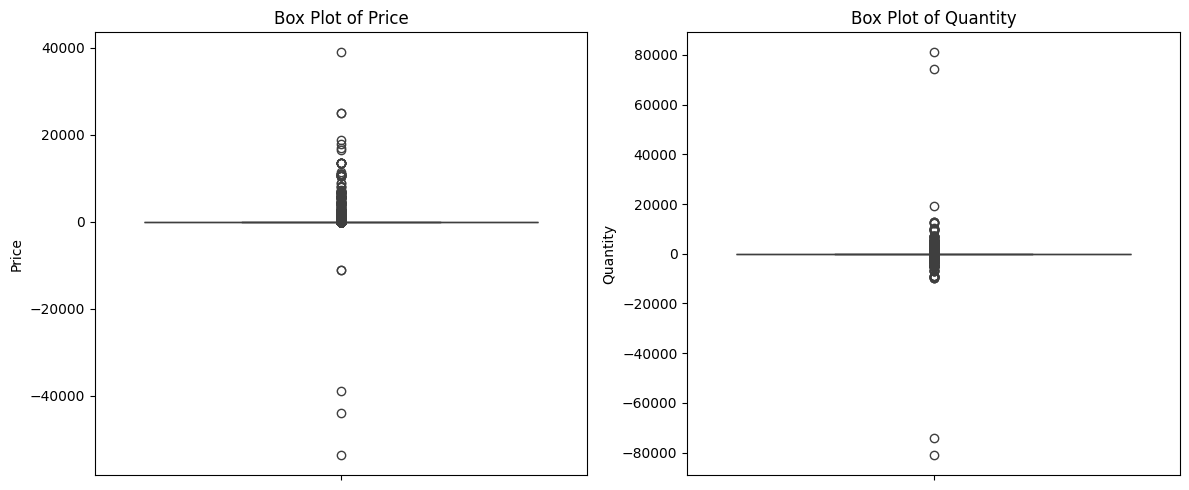

In [18]:
# Box plot for Price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data['Price'])
plt.title('Box Plot of Price')

# Box plot for Quantity
plt.subplot(1, 2, 2)
sns.boxplot(data['Quantity'])
plt.title('Box Plot of Quantity')

plt.tight_layout()
plt.show()

In [19]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_price = data['Price'].quantile(0.25)
Q3_price = data['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define bounds for outliers in Price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers in Price
price_outliers = data[(data['Price'] < lower_bound_price) | (data['Price'] > upper_bound_price)]

# Repeat the same for Quantity
Q1_quantity = data['Quantity'].quantile(0.25)
Q3_quantity = data['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

quantity_outliers = data[(data['Quantity'] < lower_bound_quantity) | (data['Quantity'] > upper_bound_quantity)]

In [20]:
print("Price Outliers:")
print(price_outliers)

print("\nQuantity Outliers:")
print(quantity_outliers)

Price Outliers:
        Invoice StockCode                     Description  Quantity  \
35       489437     21360          JOY LARGE WOOD LETTERS         1   
38       489437     35400     WOODEN BOX ADVENT CALENDAR          2   
89       489439      POST                         POSTAGE         3   
126      489444      POST                         POSTAGE         1   
131      489445     22180                 RETRO SPOT LAMP         2   
...         ...       ...                             ...       ...   
1067229  581578      POST                         POSTAGE         3   
1067247  581578     22622  BOX OF VINTAGE ALPHABET BLOCKS         6   
1067313  581580     22894   TABLECLOTH RED APPLES DESIGN          2   
1067353  581586     21217   RED RETROSPOT ROUND CAKE TINS        24   
1067370  581587      POST                         POSTAGE         1   

                InvoiceDate   Price Customer ID         Country  
35      2009-12-01 09:08:00    9.95     15362.0  United Kingdom  

In [21]:
# Example of removing outliers
data = data[(data['Price'] >= lower_bound_price) & (data['Price'] <= upper_bound_price) &
                    (data['Quantity'] >= lower_bound_quantity) & (data['Quantity'] <= upper_bound_quantity)]

<h3 style="color:#00008B"> Feature Engineering </h3>

<h4 style="color:green"> ~ Total Amount </h4>

In [22]:
# Calculate the total amount spent
data['TotalAmount'] = data['Quantity'] * data['Price']

In [23]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


<h4 style="color:green"> ~ Recency -> How recently a customer has made a purchase. </h4>

In [24]:
# Calculate recency
recent_date = data['InvoiceDate'].max()
data['Recency'] = (recent_date - data['InvoiceDate']).dt.days

In [25]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50,738
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,738
...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


<h4 style="color:green"> ~ Purchase Frequency </h4>

In [26]:
# Group by CustomerID and count the number of purchases
purchase_frequency = data.groupby('Customer ID')['InvoiceDate'].count().reset_index()
purchase_frequency.columns = ['Customer ID', 'Frequency']

# Merge frequency back to the original DataFrame
data = data.merge(purchase_frequency, on='Customer ID', how='left')

In [27]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,Recency,Frequency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738,78
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738,78
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738,78
3,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50,738,78
4,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,738,78
...,...,...,...,...,...,...,...,...,...,...,...
883457,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,44
883458,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,44
883459,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,44
883460,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,44


<h4 style="color:green"> ~ Monetary </h4>

In [28]:
# Group by CustomerID to calculate total spend
monetary_value = data.groupby('Customer ID')['TotalAmount'].sum().reset_index()
monetary_value.columns = ['Customer ID', 'Monetary']

# Merge monetary value back to the original DataFrame
data = data.merge(monetary_value, on='Customer ID', how='left')

rfm_data = data.groupby('Customer ID').agg({
    'Recency': 'min',  
    'Frequency': 'max', 
    'Monetary': 'sum'  
}).reset_index()

In [29]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,Recency,Frequency,Monetary
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738,78,1923.58
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738,78,1923.58
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738,78,1923.58
3,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50,738,78,1923.58
4,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,738,78,1923.58
...,...,...,...,...,...,...,...,...,...,...,...,...
883457,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,44,723.05
883458,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,44,723.05
883459,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,44,723.05
883460,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,44,723.05


<h3 style="color:#00008B"> EDA(Exploratory Data Analysis) </h3>

<h4 style="color:green"> ~ Daily Sales Trend </h4>

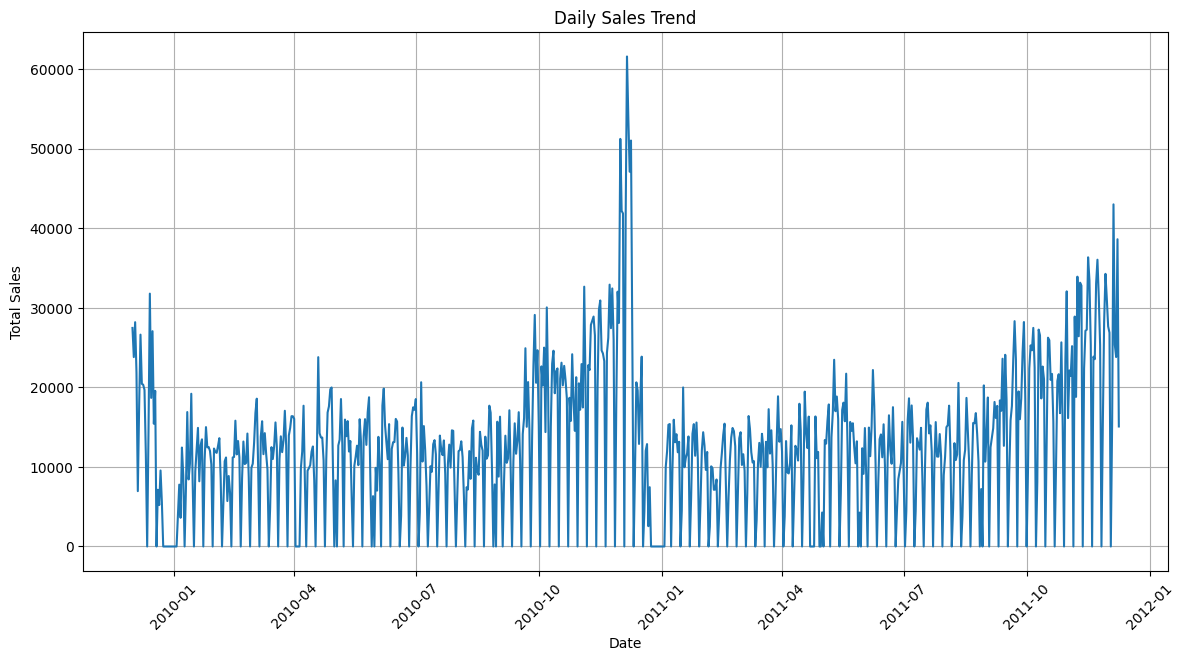

In [30]:
# Convert InvoiceDate to datetime and set as index
data.set_index('InvoiceDate', inplace=True)

# Resample data to daily frequency and sum TotalAmount
daily_sales = data['TotalAmount'].resample('D').sum()

# Plot daily sales
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [31]:
# Move the index (InvoiceDate) back to column
data = data.reset_index()

In [32]:
data

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,TotalAmount,Recency,Frequency,Monetary
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,738,78,1923.58
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,738,78,1923.58
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,738,78,1923.58
3,2009-12-01 07:45:00,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,5.95,13085.0,United Kingdom,59.50,738,78,1923.58
4,2009-12-01 07:46:00,489435,22350,CAT BOWL,12,2.55,13085.0,United Kingdom,30.60,738,78,1923.58
...,...,...,...,...,...,...,...,...,...,...,...,...
883457,2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,0,44,723.05
883458,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,0,44,723.05
883459,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,0,44,723.05
883460,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,0,44,723.05


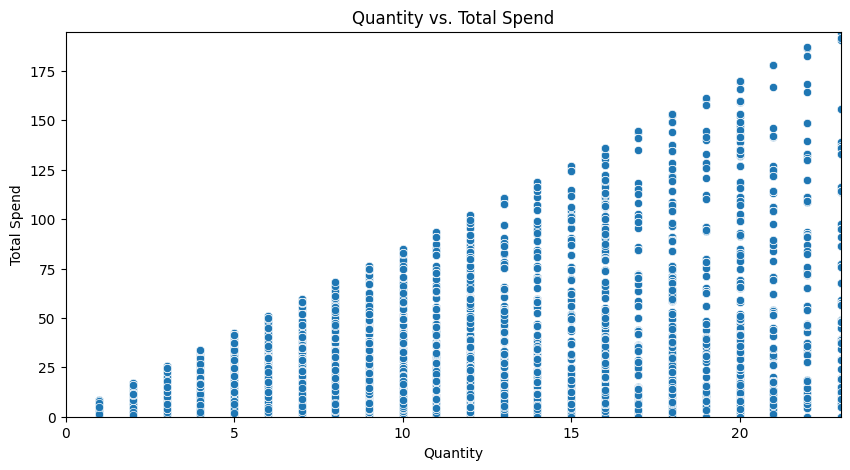

In [33]:
# Calculate Total Spend
data['TotalSpend'] = data['Quantity'] * data['Price']

# Scatter plot: Quantity vs. Total Spend
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Quantity'], y=data['TotalSpend'])
plt.title('Quantity vs. Total Spend')
plt.xlabel('Quantity')
plt.ylabel('Total Spend')
plt.xlim(0, data['Quantity'].max())  # Set limits for better visibility
plt.ylim(0, data['TotalSpend'].max())
plt.show()

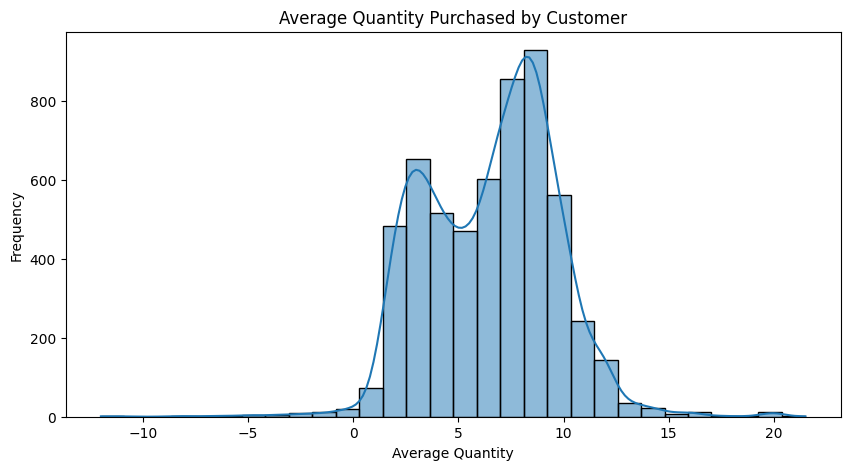

In [34]:
# Average Quantity Purchased by Customer
avg_quantity = data.groupby('Customer ID')['Quantity'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.histplot(avg_quantity['Quantity'], bins=30, kde=True)
plt.title('Average Quantity Purchased by Customer')
plt.xlabel('Average Quantity')
plt.ylabel('Frequency')
plt.show()

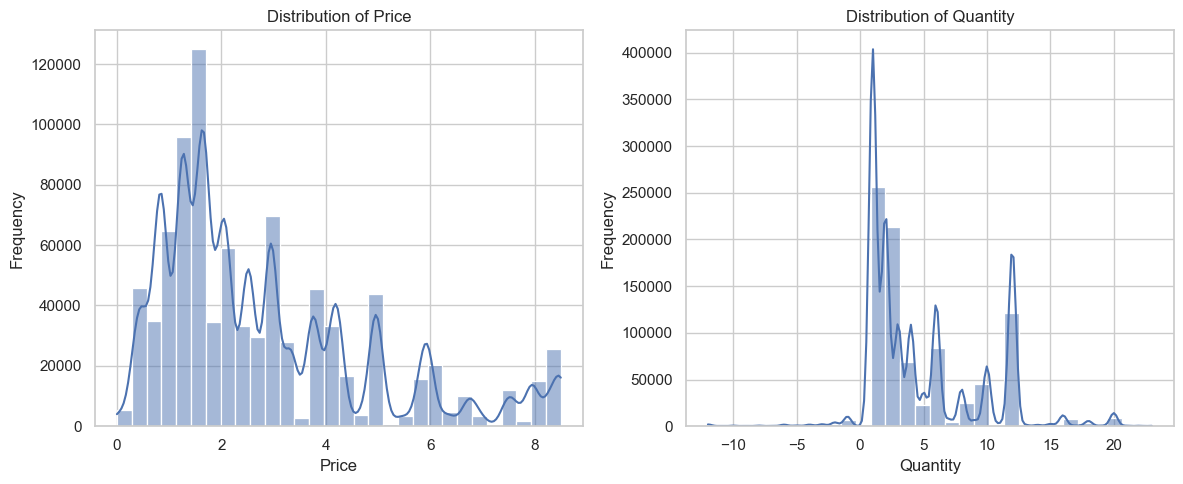

In [35]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create histograms for Price and Quantity
plt.figure(figsize=(12, 5))

# Histogram for Price
plt.subplot(1, 2, 1)
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Quantity
plt.subplot(1, 2, 2)
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h4 style="color:green"> RFM Correlation </h4>

Customer ID     object
Recency          int64
Frequency        int64
Monetary       float64
dtype: object


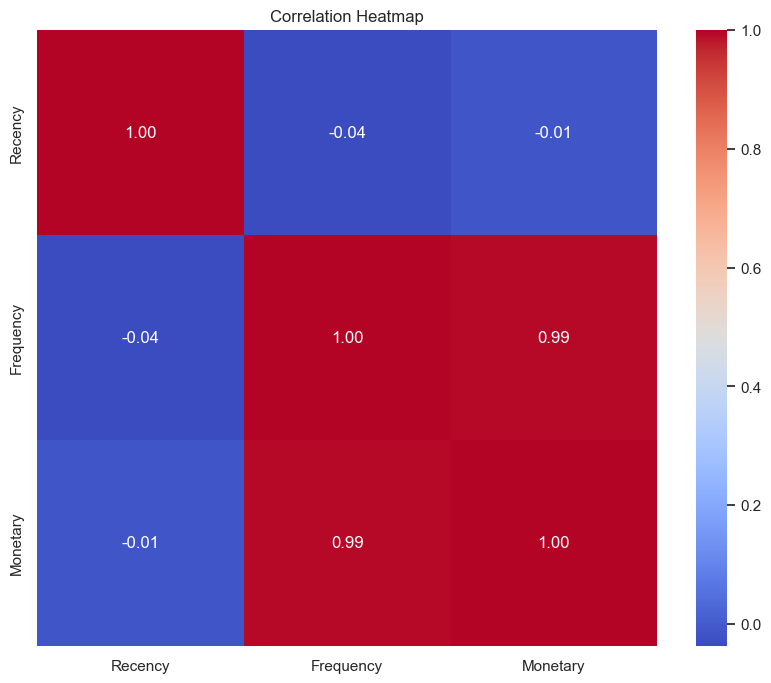

In [36]:
# Assuming rfm_data is your DataFrame
print(rfm_data.dtypes)  # Check data types

# Drop the CustomerID column if it's non-numeric and not needed
rfm_data_cleaned = rfm_data.drop(columns=['Customer ID'])

# Calculate correlations
correlation = rfm_data_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h4 style="color:green"> Scaling RFM Data </h4>

In [37]:
# Standardize RFM features to have a mean of 0 and a standard deviation of 1 for equal scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

<h4 style='color:green'> RFM Segmentation </h4>

In [38]:
# Assign quintile scores for Recency, Frequency, and Monetary values
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=False)
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 5, labels=False)
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 5, labels=False)

In [39]:
# Calculate the overall RFM score
rfm_data['RFM_Score'] = rfm_data['R_Score'] + rfm_data['F_Score'] + rfm_data['M_Score']

In [40]:
# Assign customer segments based on the RFM score using defined thresholds.
def rfm_segment(row):
    if row['RFM_Score'] >= 12:
        return 'Champions'
    elif row['RFM_Score'] >= 9:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 5:
        return 'At Risk'
    elif row['RFM_Score'] >= 3:
        return 'Hibernating'
    else:
        return 'Lost Customers'

rfm_data['Segment'] = rfm_data.apply(rfm_segment, axis=1)

<h4 style='color:green'> Customer Profiling </h4>

In [41]:
# Calculate average Recency, Frequency, and Monetary values, and count customers per segment.
segment_profile = rfm_data.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).reset_index()

print(segment_profile)

           Segment     Recency   Frequency      Monetary  Customer ID
0          At Risk  189.700552  208.797662  1.003632e+08         3079
1        Champions  480.650000  290.700000  1.202184e+06           20
2      Hibernating  278.292056   16.625389  6.307138e+03         1284
3   Lost Customers   55.658798    9.502146  1.970598e+03          466
4  Loyal Customers  190.798570  249.088200  1.137306e+06          839


<h4 style='color:green'> Clustering </h4>

In [42]:
# Perform K-Means clustering to segment customers into 5 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

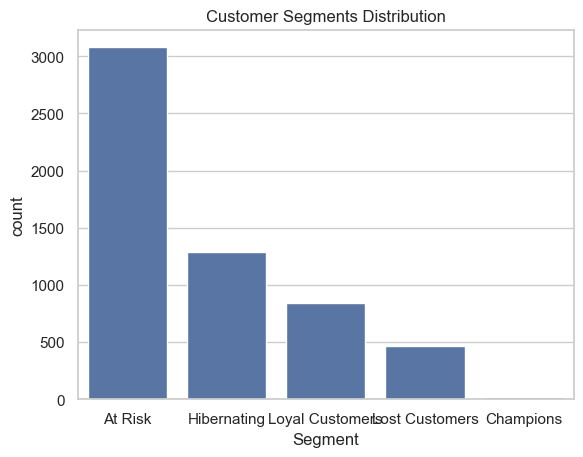

In [43]:
# Visualize the distribution of customer segments using a count plot.
sns.countplot(data=rfm_data, x='Segment')
plt.title('Customer Segments Distribution')
plt.show()